#### Simple perceptron implemented in NumPy using simple feedback learning
Dataset from: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
df_train = pd.read_csv('data/train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('data/test.txt', names=['Text', 'Emotion'], sep=';')

In [3]:
x_train = df_train['Text']
y_train = df_train['Emotion']

x_test = df_test['Text']
y_test = df_test['Emotion']

# show the head of the train dataset (head of 'data/train.txt')
#df_train.head()

In [4]:
df_train.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [5]:
# Data will be preprocessed to only get positive and negative sentiment.

# label encoding
y_train = y_train.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})
y_test = y_test.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5)#, stop_words='english')

# transform each text into a vector
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [7]:
def evaluator(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    return_list = []
    return_list.append(confusion_matrix(y_test, y_pred))
    return_list.append(accuracy_score(y_test, y_pred))
    return_list.append(precision_score(y_test, y_pred, average='macro'))
    return_list.append(recall_score(y_test, y_pred, average='macro'))
    return_list.append(f1_score(y_test, y_pred, average='macro'))
    return return_list

In [8]:
class SimpleFeedbackLearning(object):
    def __init__(self, learning_rate, n_iters):
        self.history = {}
        self.history['train_acc'] = []
        self.history['test_acc'] = []
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        
    # activation function
    def f(self, x):
        fx = np.where(x > 0.5, 1, 0)
        return fx
    
    def train(self, x, y, x_test, y_test, verbose=True):
        n_train, input_size = x.shape
        n_test = x_test.shape[0]
        # weight initialization
        self.W = np.zeros(input_size)
        self.b = np.zeros(1) # bias

        for i in range(self.n_iters):
            for xi, yi in zip(x, y):
                
                # forward and output
                output = self.f(np.matmul(self.W, xi) + self.b)

                # updating weights and biases
                if output > yi:
                    self.W -= self.learning_rate * xi
                    self.b -= self.learning_rate * 1
                elif output < yi:
                    self.W += self.learning_rate * xi
                    self.b += self.learning_rate * 1
                    
            # calculate the accuracy and save the training history
            train_acc = (self.predict(x) == y).sum() / n_train
            test_acc = (self.predict(x_test) == y_test).sum() / n_test
            self.history['train_acc'].append(train_acc)
            self.history['test_acc'].append(test_acc)
            if verbose:
                print('Epoch %d: train accuracy %.4f, test accuracy %.4f' % (i + 1, train_acc, test_acc))

    # prediction function
    def predict(self, x):
        y_pred = self.f(np.matmul(x, self.W) + self.b)
        return y_pred

In [9]:
# initializing and training the model
model1 = SimpleFeedbackLearning(learning_rate=0.01, n_iters=150)
model1.train(x_train, y_train, x_test, y_test, verbose=True)

Epoch 1: train accuracy 0.9012, test accuracy 0.8855
Epoch 2: train accuracy 0.9287, test accuracy 0.9085
Epoch 3: train accuracy 0.9369, test accuracy 0.9220
Epoch 4: train accuracy 0.9409, test accuracy 0.9205
Epoch 5: train accuracy 0.9591, test accuracy 0.9390
Epoch 6: train accuracy 0.9651, test accuracy 0.9315
Epoch 7: train accuracy 0.9597, test accuracy 0.9225
Epoch 8: train accuracy 0.9660, test accuracy 0.9370
Epoch 9: train accuracy 0.9669, test accuracy 0.9290
Epoch 10: train accuracy 0.9703, test accuracy 0.9285
Epoch 11: train accuracy 0.9699, test accuracy 0.9300
Epoch 12: train accuracy 0.9729, test accuracy 0.9350
Epoch 13: train accuracy 0.9767, test accuracy 0.9340
Epoch 14: train accuracy 0.9756, test accuracy 0.9335
Epoch 15: train accuracy 0.9749, test accuracy 0.9360
Epoch 16: train accuracy 0.9791, test accuracy 0.9350
Epoch 17: train accuracy 0.9742, test accuracy 0.9350
Epoch 18: train accuracy 0.9786, test accuracy 0.9380
Epoch 19: train accuracy 0.9754, test

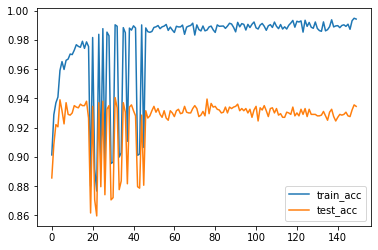

In [10]:
# plot the accuracy
plt.plot(model1.history['train_acc'], label='train_acc')
plt.plot(model1.history['test_acc'], label='test_acc')
plt.legend()
plt.show()

In [11]:
# evaluating the model with the test set

y_pred = model1.predict(x_test)
eval_list = evaluator(y_test, y_pred)

print("The confusion matrix: ")
print(eval_list[0])

print("The accuracy: ")
print(eval_list[1])

print("The precision: ")
print(eval_list[2])

print("The recall score: ")
print(eval_list[3])

print("The F1 score: ")
print(eval_list[4])

The confusion matrix: 
[[991  89]
 [ 42 878]]
The accuracy: 
0.9345
The precision: 
0.9336522472973068
The recall score: 
0.9359702093397746
The F1 score: 
0.9342902380122947
